# Checkpoint 1

Here we will just make the categorical variables as dummy and won't do much pre-processing of that data.

### Data Engineering Process

In [106]:
import pandas as pd
df = pd.read_csv('Train_BigMart.csv')
df.head()
#index got automatically added

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Target value / Dependent : Item_Outlet_Sales

In [2]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
df.shape

(8523, 12)

In [4]:
#dont run
df1 = pd.read_csv('Train_BigMart.csv', header=[0],index_col=[0])
df1.head()
#specifying 1st column should be taken as index
#and first row contains headers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Getting Summaries

In [5]:
df.dtypes
#show datatypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.describe()
#gives descriptive stats of numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Input Missing Values

In [2]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
#missing values in Item Weight and Outlet Size needs to be imputed

mean_wt = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_wt, inplace=True)

In [63]:
#outlet size is categorical, so using mode
#filling with mode_outlet[0] -> 1st value

mode_outlet = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(mode_outlet[0], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Dealing with categorical variables

In [111]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [64]:
#dropping 3 columns as not reqd
#get_dummies() will automatically break categorical column and assign its contents 0 (if absent) or 1 (if present)

df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1,inplace=True)
df=pd.get_dummies(df)
df.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [6]:
df['Item_Fat_Content_LF'].unique() 

array([0, 1], dtype=uint8)

### Create Train and Test Sets

In [65]:
from sklearn.model_selection import train_test_split as tts

train, valid = tts(df, train_size=0.7)

x_train = train.drop('Item_Outlet_Sales',axis=1)
y_train = train['Item_Outlet_Sales']

x_valid = valid.drop('Item_Outlet_Sales',axis=1)
y_valid = valid['Item_Outlet_Sales']

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 7867 to 3125
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5966 non-null   float64
 1   Item_Visibility                  5966 non-null   float64
 2   Item_MRP                         5966 non-null   float64
 3   Item_Outlet_Sales                5966 non-null   float64
 4   Item_Fat_Content_LF              5966 non-null   uint8  
 5   Item_Fat_Content_Low Fat         5966 non-null   uint8  
 6   Item_Fat_Content_Regular         5966 non-null   uint8  
 7   Item_Fat_Content_low fat         5966 non-null   uint8  
 8   Item_Fat_Content_reg             5966 non-null   uint8  
 9   Item_Type_Baking Goods           5966 non-null   uint8  
 10  Item_Type_Breads                 5966 non-null   uint8  
 11  Item_Type_Breakfast              5966 non-null   uint8  
 12  Item_Type_Canned 

In [8]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 8365 to 1971
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      2557 non-null   float64
 1   Item_Visibility                  2557 non-null   float64
 2   Item_MRP                         2557 non-null   float64
 3   Item_Outlet_Sales                2557 non-null   float64
 4   Item_Fat_Content_LF              2557 non-null   uint8  
 5   Item_Fat_Content_Low Fat         2557 non-null   uint8  
 6   Item_Fat_Content_Regular         2557 non-null   uint8  
 7   Item_Fat_Content_low fat         2557 non-null   uint8  
 8   Item_Fat_Content_reg             2557 non-null   uint8  
 9   Item_Type_Baking Goods           2557 non-null   uint8  
 10  Item_Type_Breads                 2557 non-null   uint8  
 11  Item_Type_Breakfast              2557 non-null   uint8  
 12  Item_Type_Canned 

### Running the Algorithm

In [66]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
#Running KNR process with 3 neighbors

model = KNR(n_neighbors=3)

In [68]:
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [69]:
y_pred=model.predict(x_valid)

In [70]:
print(y_pred[0:10])

[3064.0116     1794.10906667 4655.49553333 2162.5184     1388.63686667
 1629.8784     3858.08906667  792.302      5546.33593333 4161.9158    ]


In [71]:
#calculate rmse
error = sqrt(mean_squared_error(y_valid,y_pred))
print(error)

1347.9849027954854


#### So MSE is 1347.9 when k=3.

In [72]:
#Now running KNR process for different k values

rmse_val_list = []

for k in range(12):
    k = k+1
    model = KNR(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_valid)
    error = sqrt(mean_squared_error(y_valid,y_pred))
    print("RMSE value for k = ",k," is: ", error)
    rmse_val_list.append(error) #in empty list appending error values

print("The minimum error we get is :", min(rmse_val_list))
print("The correponding k value is :", 1+rmse_val_list.index(min(rmse_val_list))) #basic index in list is 0, so add 1

#ideal K value will have least error

RMSE value for k =  1  is:  1637.7887125420366
RMSE value for k =  2  is:  1410.3951795588732
RMSE value for k =  3  is:  1347.9849027954854
RMSE value for k =  4  is:  1312.7269700070433
RMSE value for k =  5  is:  1290.9710804478436
RMSE value for k =  6  is:  1282.2425977435112
RMSE value for k =  7  is:  1271.783937373707
RMSE value for k =  8  is:  1280.2595713082294
RMSE value for k =  9  is:  1284.8906951310435
RMSE value for k =  10  is:  1290.4455621472284
RMSE value for k =  11  is:  1297.587373453524
RMSE value for k =  12  is:  1300.3350520121871
The minimum error we get is : 1271.783937373707
The correponding k value is : 7


#### Running a loop over k values and finding least error. MSE is 1271.7 when k=7.

In [73]:
#how many K to take? √(total number of records)
#for valid set -> √2557, so K will take near to 50 values
#ideal K value will have least error

rmse_val_list = []

iter_len=len(x_valid)
iter_size=round(sqrt(iter_len))

for k in range(iter_size):
    k = k+1
    model = KNR(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_valid)
    error = sqrt(mean_squared_error(y_valid,y_pred))
    #print("RMSE value for k = ",k," is: ", error)
    rmse_val_list.append(error) #in empty list appending error values

print("The minimum error we get is :", min(rmse_val_list))
print("The correponding k value is :", 1+rmse_val_list.index(min(rmse_val_list))) #basic index in list is 0, so add 1

The minimum error we get is : 1271.783937373707
The correponding k value is : 7


# Checkpoint 2

Now we will do some pre-processing, take dummies for categorical variables, drop the first column, and then try to check for which value of k model gives least error. Also we will do some scaling.

### Preprocessing - Data Engineering

#### Drop Columns

In [74]:
#taking dataset again and do a lot of standardization to see if it improves the model
#dropping 2 columns
df = pd.read_csv('Train_BigMart.csv')
df_clean = df.drop(['Item_Identifier','Outlet_Identifier'], axis=1,inplace=False)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [14]:
df_clean.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
df_clean['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [75]:
#replace reg, LF, low fat
df_clean['Item_Fat_Content']=df_clean['Item_Fat_Content'].replace('reg','Regular')
df_clean['Item_Fat_Content']=df_clean['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df_clean['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
df_clean['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
df_clean['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df_clean['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
df_clean['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
df_clean.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
mean_wt = df['Item_Weight'].mean()
df_clean['Item_Weight'].fillna(mean_wt, inplace=True)

mode_outlet = df['Outlet_Size'].mode()
df_clean['Outlet_Size'].fillna(mode_outlet[0], inplace=True)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [77]:
#assign 0 or 1 to n-1 categories of each column
df_clean=pd.get_dummies(df_clean, drop_first=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Regular         8523 non-null   uint8  
 6   Item_Type_Breads                 8523 non-null   uint8  
 7   Item_Type_Breakfast              8523 non-null   uint8  
 8   Item_Type_Canned                 8523 non-null   uint8  
 9   Item_Type_Dairy                  8523 non-null   uint8  
 10  Item_Type_Frozen Foods           8523 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 12  Item_Type_Hard Drink

In [78]:
from sklearn.model_selection import train_test_split as tts

train, valid = tts(df_clean, train_size=0.7)

x_train = train.drop('Item_Outlet_Sales',axis=1)
y_train = train['Item_Outlet_Sales']

x_valid = valid.drop('Item_Outlet_Sales',axis=1)
y_valid = valid['Item_Outlet_Sales']

In [79]:
#scaling the data
#never scale target variable

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
X_valid = pd.DataFrame(x_valid_scaled)

In [80]:
#how many K to take? √(total number of records)
#for valid set -> √2557, so K will take near to 50 values

iter_len=len(X_valid)
iter_size=round(sqrt(iter_len))

rmse_val_df = pd.DataFrame(columns=["K","Error"])
rmse_val_list = list() #to store rmse values for different K

for k in range(iter_size):
    k = k+1
    model = KNR(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_valid)
    error = sqrt(mean_squared_error(y_valid,y_pred))
    #print("RMSE value for k = ",k," is: ", error)
    rmse_val_list.append(error) #in empty list appending error values
    rmse_val_df = rmse_val_df.append({'K':k,'Error':error},ignore_index=True) #storing RMSE values in DF

min_K = rmse_val_df.loc[rmse_val_df["Error"]==rmse_val_df["Error"].min()]
print("The optimal k value for the KNN is :", int(min_K["K"]),"with minimum error as", rmse_val_df["Error"].min())


The optimal k value for the KNN is : 9 with minimum error as 1238.5132466126734


#### While generating dummy variables for categorical values, we dropped the first columns. Then we did Min Max scaling on non target variables. Now we got MSE as 1238.5 when k = 9.

## Plotting Values

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

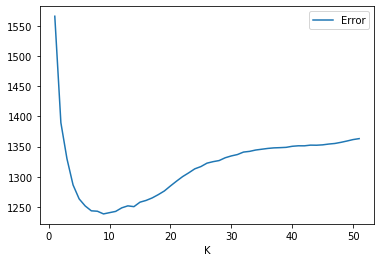

In [82]:
curve = pd.DataFrame(rmse_val_df).set_index('K')
curve.plot()
#elbow curve

### Doing Grid Search

In [83]:
#passing model through diff values of k, and we take whichever gives least error -> previous way
#for different folds/values of k, trying to find for which value of k i am getting minm error for all cross valid -> grid way

from sklearn.model_selection import GridSearchCV

#number_of_neighbours = range(1,200)
number_of_neighbors = range(1,iter_size)
#iter_size = 51

params = {'n_neighbors':number_of_neighbors}

#no. of neigh in parameter -> range from 1 to 51
#for each value of param it will search entire plane what is the ideal value of k

In [84]:
knn = KNR()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

#divide training data into 5 parts, each having same number of records
#for 1st iter, use 1st part for test and rest 4 for train
#for 2nd iter, use 2nd part for test and rest 4 for train

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 51)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [85]:
print(model.best_params_)
#provide best parameter

{'n_neighbors': 8}


## Using the Model to Predict values on Test Data

In [94]:
df_Test = pd.read_csv('Test_BigMart.csv', header=[0])
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [95]:
df_Test.shape

(5681, 11)

In [96]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [97]:
print (df_Test["Item_Fat_Content"].unique())
print (df_Test["Item_Type"].unique())
print (df_Test["Outlet_Size"].unique())
print (df_Test["Outlet_Location_Type"].unique())
print (df_Test["Outlet_Type"].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['Medium' nan 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [98]:
df_Test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [99]:
df_Test["Item_Fat_Content"] = df_Test["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')
df_Test["Item_Fat_Content"] = df_Test["Item_Fat_Content"].replace('reg','Regular')
df_Test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [100]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean_wt = df_Test['Item_Weight'].mean() #imputing item_weight with mean
df_Test['Item_Weight'].fillna(mean_wt, inplace =True)

mode_Outlet = df_Test['Outlet_Size'].mode() #imputing outlet size with mode
df_Test['Outlet_Size'].fillna(mode_Outlet[0], inplace =True)

df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [101]:
x_test = df_Test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=False)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [102]:
x_test = pd.get_dummies(x_test, drop_first=True)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Establishment_Year        5681 non-null   int64  
 4   Item_Fat_Content_Regular         5681 non-null   uint8  
 5   Item_Type_Breads                 5681 non-null   uint8  
 6   Item_Type_Breakfast              5681 non-null   uint8  
 7   Item_Type_Canned                 5681 non-null   uint8  
 8   Item_Type_Dairy                  5681 non-null   uint8  
 9   Item_Type_Frozen Foods           5681 non-null   uint8  
 10  Item_Type_Fruits and Vegetables  5681 non-null   uint8  
 11  Item_Type_Hard Drinks            5681 non-null   uint8  
 12  Item_Type_Health and

In [103]:
x_test_scaled = scaler.fit_transform(x_test)
X_test = pd.DataFrame(x_test_scaled)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5681 non-null   float64
 1   1       5681 non-null   float64
 2   2       5681 non-null   float64
 3   3       5681 non-null   float64
 4   4       5681 non-null   float64
 5   5       5681 non-null   float64
 6   6       5681 non-null   float64
 7   7       5681 non-null   float64
 8   8       5681 non-null   float64
 9   9       5681 non-null   float64
 10  10      5681 non-null   float64
 11  11      5681 non-null   float64
 12  12      5681 non-null   float64
 13  13      5681 non-null   float64
 14  14      5681 non-null   float64
 15  15      5681 non-null   float64
 16  16      5681 non-null   float64
 17  17      5681 non-null   float64
 18  18      5681 non-null   float64
 19  19      5681 non-null   float64
 20  20      5681 non-null   float64
 21  21      5681 non-null   float64
 22  

In [104]:
Y_pred = model.predict(X_test)
#predicting values of Item_Outlet_Sales on test data and saving in Y_pred

In [105]:
Y_pred.mean()

2160.835924806372

Here we are applying KNN on training data (8523 records) to find out for which value of KNN, the MSE has the least error (for k=9).
Next we applied GridSearchCV to find out for which fold we are getting least error (for k=8).
Finally we are applying this model to predict the values of Item_Outlet_Sales on test dataset (5681 records), whose mean score we got as 2160.83